In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
data_path = "../data/combined_master_dataset.csv"
df = pd.read_csv(data_path)

In [5]:
# --- 1. Topic Modeling (LDA) ---
print("\n\n--- Topic Modeling with LDA ---")
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['content'].dropna())

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

terms = vectorizer.get_feature_names_out()

for idx, topic in enumerate(lda.components_):
    print(f"\nTopic {idx}:")
    print([terms[i] for i in topic.argsort()[:-11:-1]])



--- Topic Modeling with LDA ---

Topic 0:
['people', 'like', 'time', 'life', 'just', 'says', 'years', 'mental', 'feel', 'don']

Topic 1:
['cid', 'anxiety', '10', 'al', 'et', 'depression', 'time', 'data', '19', 'model']

Topic 2:
['health', 'mental', 'people', 'said', 'care', 'children', 'services', 'year', 'support', 'young']

Topic 3:
['depression', 'data', 'model', 'features', 'al', 'et', 'based', 'social', 'learning', 'using']

Topic 4:
['people', 'research', 'depression', 'study', 'patients', 'therapy', 'brain', 'dementia', 'drug', 'drugs']




--- Time Evolution of Terms ---


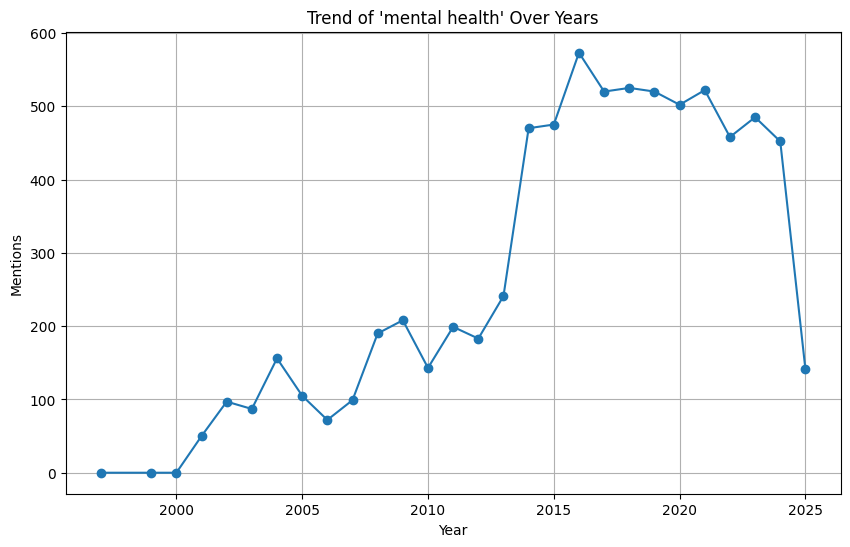

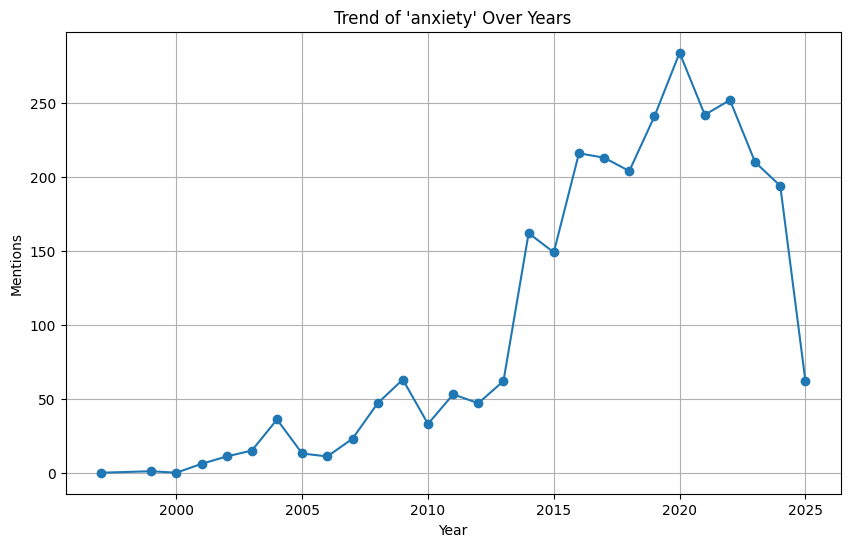

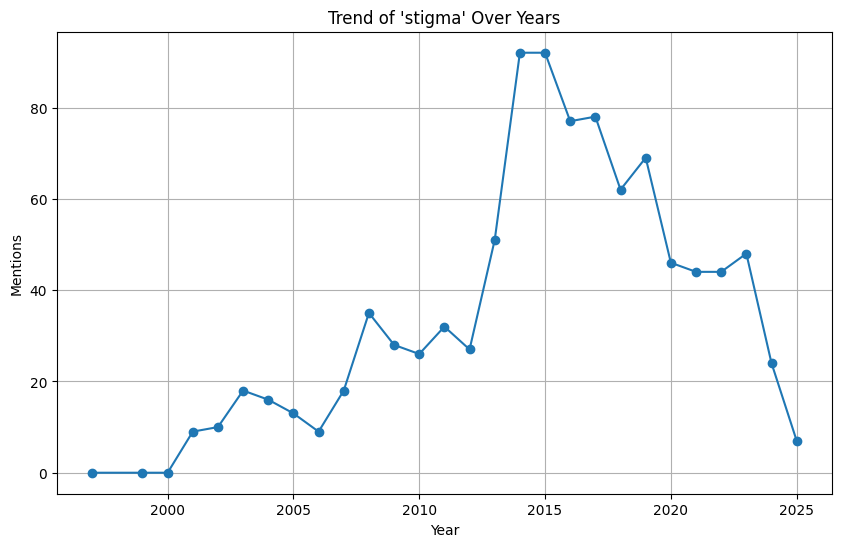

In [6]:
# --- 2. Time Evolution of Key Terms ---
print("\n\n--- Time Evolution of Terms ---")
def plot_term_trend(term):
    term = term.lower()
    yearly_counts = {}
    for year in sorted(df['year'].dropna().unique()):
        subset = df[df['year'] == year]['content'].dropna()
        count = sum(term in str(doc).lower() for doc in subset)
        yearly_counts[year] = count
    
    plt.figure(figsize=(10,6))
    plt.plot(list(yearly_counts.keys()), list(yearly_counts.values()), marker='o')
    plt.title(f"Trend of '{term}' Over Years")
    plt.xlabel('Year')
    plt.ylabel('Mentions')
    plt.grid(True)
    plt.show()

plot_term_trend("mental health")
plot_term_trend("anxiety")
plot_term_trend("stigma")



--- Sentiment Analysis ---


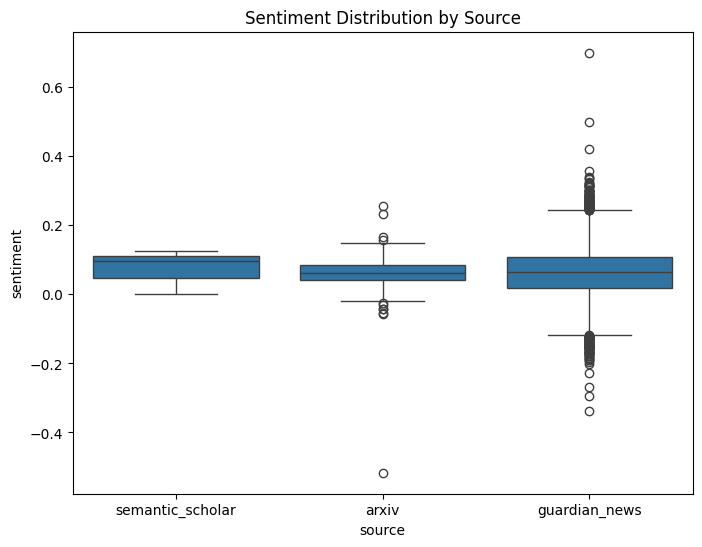

In [7]:
# --- 3. Sentiment Analysis ---
print("\n\n--- Sentiment Analysis ---")
def compute_sentiment(text):
    if pd.isna(text):
        return 0
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['content'].apply(compute_sentiment)

plt.figure(figsize=(8,6))
sns.boxplot(x='source', y='sentiment', data=df)
plt.title('Sentiment Distribution by Source')
plt.show()


Classification Report:
                  precision    recall  f1-score   support

           arxiv       1.00      0.98      0.99        65
   guardian_news       1.00      1.00      1.00      2208
semantic_scholar       0.00      0.00      0.00         1

        accuracy                           1.00      2274
       macro avg       0.67      0.66      0.66      2274
    weighted avg       1.00      1.00      1.00      2274



C:\Users\kashi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kashi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kashi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

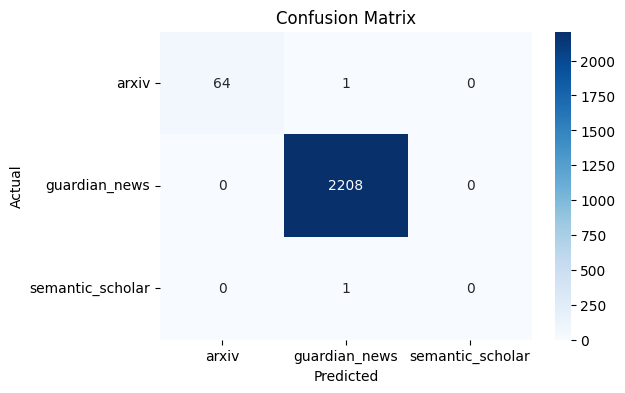


Source Classification Complete!


In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined dataset
data_path = "../data/combined_master_dataset_with_hf_sentiment.csv"
df = pd.read_csv(data_path)

# Prepare features and labels
X = df['content'].fillna("")
y = df['source']  # 'arxiv' or 'guardian_news'

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_vec = vectorizer.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Train Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nSource Classification Complete!")


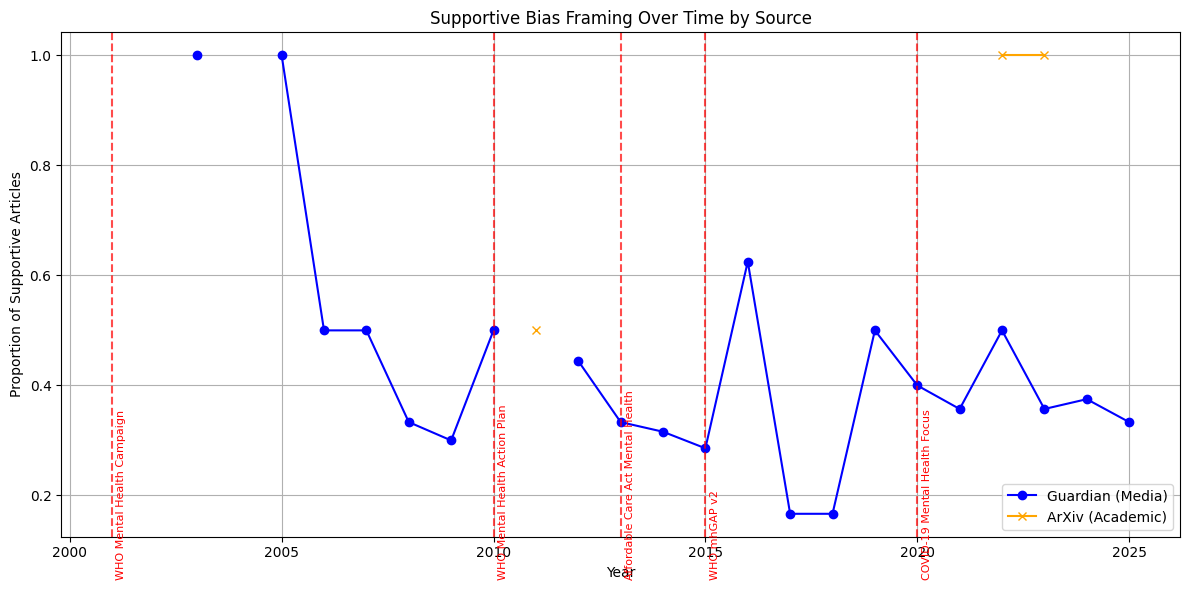


Bias Framing Trends by Source plotted successfully!


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the bias classification sample
bias_sample_path = "../data/sample_bias_framing_results.csv"
bias_df = pd.read_csv(bias_sample_path)

# Separate Guardian and ArXiv data
guardian_df = bias_df[bias_df['source'] == 'guardian_news']
arxiv_df = bias_df[bias_df['source'] == 'arxiv']

# Calculate supportive proportions per year
guardian_supportive_trend = guardian_df[guardian_df['bias_framing'] == 'supportive'].groupby('year').size() / guardian_df.groupby('year').size()
arxiv_supportive_trend = arxiv_df[arxiv_df['bias_framing'] == 'supportive'].groupby('year').size() / arxiv_df.groupby('year').size()

# Advocacy milestones
advocacy_events = {
    2001: "WHO Mental Health Campaign",
    2010: "WHO Mental Health Action Plan",
    2013: "Affordable Care Act Mental Health",
    2015: "WHO mhGAP v2",
    2020: "COVID-19 Mental Health Focus"
}

# Plot
plt.figure(figsize=(12,6))
plt.plot(guardian_supportive_trend.index, guardian_supportive_trend.values, label='Guardian (Media)', marker='o', color='blue')
plt.plot(arxiv_supportive_trend.index, arxiv_supportive_trend.values, label='ArXiv (Academic)', marker='x', color='orange')

for year, label in advocacy_events.items():
    plt.axvline(x=year, color='red', linestyle='--', alpha=0.7)
    plt.text(year+0.1, 0.05, label, rotation=90, color='red', fontsize=8)

plt.title('Supportive Bias Framing Over Time by Source')
plt.xlabel('Year')
plt.ylabel('Proportion of Supportive Articles')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nBias Framing Trends by Source plotted successfully!")
